In [1]:
#part II

def euler_method(f,x0,t0,dt,num_steps):       #Defining euler method function
    
    t = [t0] #list of time values
    x = [x0] #list of approximate solution values
    
    # f= the derivative function
    # x0= initial value of x at t0
    # t0= the initial time value
    # dt= the time step size
    # num_steps= number of steps to take
    
    for i in range(num_steps):
        t_value = t[i] + dt
        x_value = x[i] + dt*(f(x[i]))
        
        t.append(t_value)
        x.append(x_value)
    
    return t,x

In [4]:
#part III
#(b)
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 0.1*x - 0.001*(x**2)

tValue , xValue = euler_method(f,2000,0,0.001,4000)  #calling eulers method function


print("x value:",xValue[-1])


x value: 275.22806739414483


In [16]:
#part III
#(c)
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

percentageError = (np.abs(xValue[-1]-275.333)/275.333)*100  #finding the percentage error, 275.333 is the value obtained analytically
print("Percentage Error:",percentageError)

Percentage Error: 0.03811116206745901


In [22]:
#part IV
#(c)
def f(x):
    return (5-x)/2

tValues , xValues = euler_method(f,0,0,0.01,400)      #calling eulers method function

print("x value:",xValues[-1])

x value: 4.326709785369929


In [23]:
#part IV
#(d)

percentageError = ((xValues[-1]-4.3234)/4.3234)*100        #calculating percentage error
print("Percentage Error:",percentageError)

Percentage Error: 0.07655515034299104


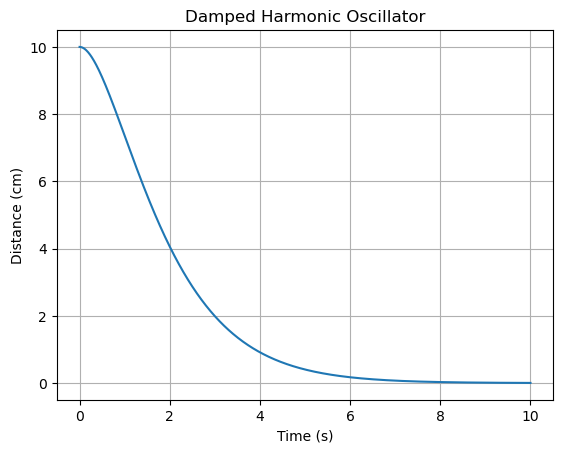

In [30]:
#part V
#(b)

import numpy as np
import matplotlib.pyplot as plt

def damp(t, C1, C2, b, m):
    return C1 * np.exp(-b/(2*m)*t) + C2 * t * np.exp(-b/(2*m)*t)

t = np.linspace(0, 10, 1000)   #Parameters
m = 1.0 
k = 1.0  

b = np.sqrt(4 * m * k)  # Damping coefficient of b^2 = 4mk
C1_1 = 10.0
C2_1 = -10 * (-b/(2*m))
x_1 = damp(t, C1_1, C2_1, b, m)


plt.plot(t, x_1)
plt.xlabel('Time (s)')
plt.ylabel('Distance (cm)')
plt.title('Damped Harmonic Oscillator')
plt.grid(True)
plt.show()

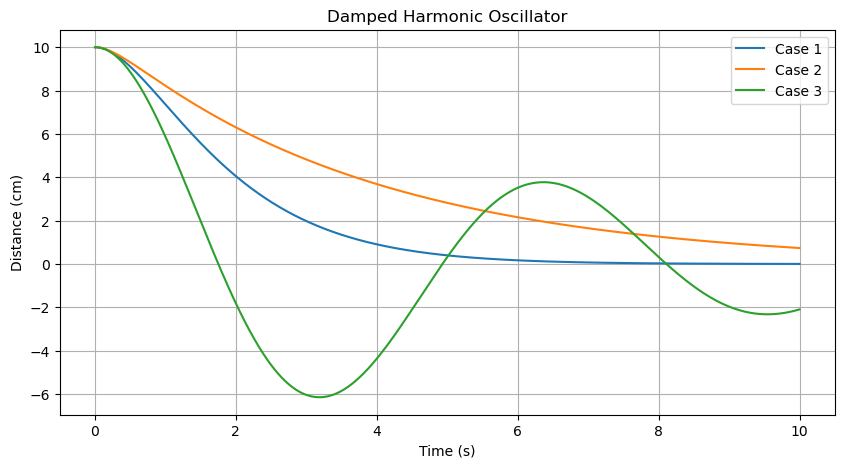

In [4]:
#part V
#(c)

import numpy as np
import matplotlib.pyplot as plt

#defining eulers method for damped oscillation
def euler_method_damped_harmonic(f, x0, v0, t0, dt, num_steps, b, m):
    
    t = t0
    x = x0
    v = v0
    xSolution = [x0]
    vSolution = [v0]

    for _ in range(num_steps):
        a = f(t, x, v, b, m)
        x = x + v * dt
        v = v + a * dt
        t = t + dt
        xSolution.append(x)
        vSolution.append(v)

    return xSolution, vSolution

m = 1.0 
k = 1.0 
# Define the ODE for a damped harmonic oscillator
def damped_harmonic_ode(t, x, v, b, m):
    return -b/m * v - k/m * x

x0 = 10  
v0 = 0.0 
t0 = 0.0 
dt = 0.01  
num_steps = 1000 

#when b^2 = 4mk 
b_1 = np.sqrt(4 * m * k)
xSolution1, vSolution1 = euler_method_damped_harmonic(damped_harmonic_ode, x0, v0, t0, dt, num_steps-1, b_1, m)

#when b^2 > 4mk 
b_2 = np.sqrt(16 * m * k)
xSolution2, vSolution2 = euler_method_damped_harmonic(damped_harmonic_ode, x0, v0, t0, dt, num_steps-1, b_2, m)

#when b^2 < 4mk 
b_3 =  np.sqrt(0.1 * m * k)
xSolution3, vSolution3 = euler_method_damped_harmonic(damped_harmonic_ode, x0, v0, t0, dt, num_steps-1, b_3, m)

t = np.linspace(0, 10, 1000)  
plt.figure(figsize=(10,5))
plt.plot(t, xSolution1, label='Case 1')
plt.plot(t, xSolution2, label='Case 2')
plt.plot(t, xSolution3, label='Case 3')
plt.xlabel('Time (s)')
plt.ylabel('Distance (cm)')
plt.title('Damped Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()
